In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit
from xgboost import XGBRegressor
from sklearn.ensemble import VotingClassifier

In [2]:
parkinsons_data = pd.read_csv('../datasets/parkinsons disease dataset/parkinsons_udprs_one.csv')

In [3]:
parkinsons_data.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,1,72,0,25.6470,0.00340,0.000021,0.00178,0.00162,0.00533,0.01452,...,0.00765,0.00926,0.02132,0.016636,25.986,0.42271,0.56963,0.11774,35.810,28.905
1,1,72,0,103.6400,0.00395,0.000023,0.00158,0.00232,0.00473,0.01208,...,0.00637,0.00879,0.01533,0.022641,28.220,0.44028,0.59017,0.24612,41.657,32.243
2,1,72,0,5.6431,0.00348,0.000016,0.00124,0.00133,0.00372,0.01192,...,0.00463,0.00949,0.01234,0.009238,27.927,0.37340,0.52499,0.17066,34.398,28.199
3,1,72,0,47.6490,0.00800,0.000043,0.00417,0.00423,0.01252,0.01329,...,0.00649,0.01069,0.01652,0.060182,25.347,0.43478,0.55140,0.26728,37.363,29.682
4,1,72,0,47.6510,0.00514,0.000027,0.00192,0.00223,0.00575,0.02012,...,0.01118,0.02001,0.02607,0.017879,23.309,0.50064,0.54761,0.21011,37.364,29.682


In [4]:
parkinsons_data.shape

(1058, 22)

In [5]:
parkinsons_data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
motor_UPDRS      0
total_UPDRS      0
dtype: int64

target_variable = parkinsons_data[['motor_UPDRS','total_UPDRS']]
scaler = StandardScaler()
normalized_target = scaler.fit_transform(target_variable)
num_clusters = 2
n_init=10
kmeans = KMeans(n_clusters=num_clusters,n_init=n_init, random_state=0)
kmeans.fit(normalized_target)
cluster_labels = kmeans.labels_
parkinsons_data['target_label'] = cluster_labels
parkinsons_data.to_csv('../datasets/parkinsons_trained_udprs.csv', index=False)

In [6]:
x = parkinsons_data.iloc[:,:-2]
y = parkinsons_data.iloc[:,-2:]

In [7]:
y

,motor_UPDRS,total_UPDRS
0,35.810,28.905
1,41.657,32.243
2,34.398,28.199
3,37.363,29.682
4,37.364,29.682
...,...,...
1053,34.979,23.979
1054,33.908,22.908
1055,33.908,22.908
1056,33.908,22.908


In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [9]:
xTrain

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
161,6,63,0,138.3400,0.00314,0.000024,0.00121,0.00167,0.00363,0.03780,0.344,0.02054,0.02204,0.02753,0.06161,0.006303,24.721,0.43093,0.64113,0.15844
952,39,66,0,124.4800,0.00320,0.000020,0.00166,0.00176,0.00499,0.02476,0.223,0.01289,0.01538,0.02012,0.03868,0.004522,25.061,0.61719,0.59408,0.15161
728,29,78,0,87.3500,0.00397,0.000026,0.00172,0.00192,0.00517,0.02173,0.213,0.01011,0.01250,0.01879,0.03034,0.021024,23.308,0.48137,0.63050,0.18839
1050,42,61,0,-4.2604,0.00529,0.000044,0.00243,0.00275,0.00728,0.02592,0.225,0.01222,0.01470,0.02119,0.03667,0.030559,21.910,0.52372,0.66131,0.21283
223,8,73,1,120.5500,0.00346,0.000019,0.00189,0.00188,0.00568,0.02042,0.173,0.01105,0.01173,0.01560,0.03316,0.008148,22.187,0.52245,0.67575,0.15161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1,72,0,174.6600,0.00369,0.000022,0.00149,0.00183,0.00446,0.02385,0.222,0.01123,0.01306,0.02232,0.03370,0.010868,25.000,0.49219,0.61602,0.18939
902,37,56,1,126.7400,0.00466,0.000023,0.00277,0.00242,0.00832,0.02089,0.186,0.01207,0.01260,0.01408,0.03620,0.020809,21.597,0.35971,0.60204,0.10662
852,35,71,0,27.4420,0.00550,0.000038,0.00269,0.00312,0.00807,0.02506,0.232,0.01223,0.01477,0.01919,0.03668,0.012166,21.277,0.40331,0.75764,0.25220
57,3,57,0,168.2700,0.00199,0.000013,0.00087,0.00115,0.00261,0.01120,0.109,0.00573,0.00707,0.00952,0.01720,0.004082,29.682,0.40309,0.55386,0.10145


In [10]:
yTrain

,motor_UPDRS,total_UPDRS
161,43.156,28.104
952,43.104,32.472
728,28.425,23.304
1050,28.634,19.725
223,26.255,20.255
...,...,...
19,47.970,36.977
902,44.796,34.997
852,54.312,36.312
57,39.947,28.011


param_grid = {
    'linear': {'C': [0.01, 0.1, 1, 10, 100]},
    'rbf': {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
    'poly': {'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]},
}

kernels = {'linear': 'linear', 'rbf': 'rbf', 'poly': 'poly'}

for name, kernel in kernels.items():
    clf = GridSearchCV(SVC(kernel=kernel), param_grid[name], cv=5, n_jobs=-1)
    clf.fit(xTrain, yTrain)
    print(f"{name}: best hyperparameters: {clf.best_params_}, best score: {clf.best_score_}")

    # Evaluate the performance of the SVM model on the testing set
    yPred = clf.predict(xTest)
    accuracy = accuracy_score(yTest, yPred)
    print(f"{name}: accuracy on testing set: {accuracy:.3f}")

In [12]:
svm_model = MultiOutputRegressor(SVR(kernel='rbf', C=1, gamma=0.1, epsilon=.1))
xgb_model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=7))
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))

svm_mse_scores = -cross_val_score(svm_model, x, y, cv=5, scoring='neg_mean_squared_error')
svm_mae_scores = -cross_val_score(svm_model, x, y, cv=5, scoring='neg_mean_absolute_error')
svm_r2_scores = cross_val_score(svm_model, x, y, cv=5, scoring='r2')
svm_rmse = np.mean(np.sqrt(svm_mse_scores))
svm_mae = np.mean(svm_mae_scores)
svm_r2 = np.mean(svm_r2_scores)
print('SVM MSE Scrores:', svm_mse_scores)
print('SVM mean RMSE:', np.mean(np.sqrt(svm_mse_scores)))
print('SVM MAE scores:', svm_mae_scores)
print('SVM mean MAE:', np.mean(svm_mae_scores))
print('SVM R2 scores', svm_r2_scores)
print('SVM mean R2:', np.mean(svm_r2_scores))
print("--"*40)

rf_mse_scores = -cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_squared_error')
rf_mae_scores = -cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_absolute_error')
rf_r2_scores = cross_val_score(rf_model, x, y, cv=5, scoring='r2')
rf_rmse = np.mean(np.sqrt(rf_mse_scores))
rf_mae = np.mean(rf_mae_scores)
rf_r2 = np.mean(rf_r2_scores)
print('Random Forest MSE scores:', rf_mse_scores)
print('Random Forest mean RMSE:', np.mean(np.sqrt(rf_mse_scores)))
print('Random Forest mean MAE scores:', rf_mae_scores)
print('Random Forest mean MAE:', np.mean(rf_mae_scores))
print('Random Forest mean R2 scores:', rf_r2_scores)
print('Random Forest mean R2:', np.mean(rf_r2_scores))
print("--"*40)

xgb_mse_scores = -cross_val_score(xgb_model, x, y, cv=5, scoring='neg_mean_squared_error')
xgb_mae_scores = -cross_val_score(xgb_model, x, y, cv=5, scoring='neg_mean_absolute_error')
xgb_r2_scores = cross_val_score(xgb_model, x, y, cv=5, scoring='r2')
xgb_rmse = np.mean(np.sqrt(xgb_mse_scores))
xgb_mae = np.mean(xgb_mae_scores)
xgb_r2 = np.mean(xgb_r2_scores)
print('XGBoost MSE scores:', xgb_mse_scores)
print('XGBoost mean RMSE:', np.mean(np.sqrt(xgb_mse_scores)))
print('XGBoost MAE scores:', xgb_mae_scores)
print('XGBoost mean MAE:', np.mean(xgb_mae_scores))
print('XGBoost R2 scores:', xgb_r2_scores)
print('XGBoost mean R2:', np.mean(xgb_r2_scores))
print("--"*40)

SVM MSE Scrores: [ 88.28371936  81.96825372 149.05607075  95.53365598 124.98948498]
SVM mean RMSE: 10.322485495178006
SVM MAE scores: [ 8.21184574  8.07575132 10.65497128  8.10910378  8.54453278]
SVM mean MAE: 8.719240981959409
SVM R2 scores [-0.1631824  -2.02773084 -0.20535307 -0.23442527 -1.04892622]
SVM mean R2: -0.7359235619017426
--------------------------------------------------------------------------------
Random Forest MSE scores: [119.66632128 112.5682856   71.90675391 305.19029073  68.06678294]
Random Forest mean RMSE: 11.149754289867397
Random Forest mean MAE scores: [ 9.46000606  8.71700329  6.48056317 13.48010783  6.47118337]
Random Forest mean MAE: 8.921772744144679
Random Forest mean R2 scores: [-0.60721178 -3.26052843  0.46105824 -2.21890357 -0.17291968]
Random Forest mean R2: -1.159701042873924
--------------------------------------------------------------------------------
XGBoost MSE scores: [128.97881038 168.69269413 150.57713016 227.8169586   97.7926469 ]
XGBoost 

In [ ]:
print(svm_rmse, svm_mae, svm_r2)
print(xgb_rmse, xgb_mae, xgb_r2)
print(rf_rmse, rf_mae, rf_r2)
scores = pd.DataFrame({
    'SVM': [svm_rmse, svm_mae, svm_r2],
    'XGBoost': [xgb_rmse, xgb_mae, xgb_r2],
    'Random Forest': [rf_rmse, rf_mae, rf_r2]
}, index=['RMSE', 'MAE', 'R2'])

# Calculate the correlation between the scores using the corr function from pandas
corr_matrix = scores.corr()
print(corr_matrix)
# # Plot the correlation matrix using the heatmap function from seaborn
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.6f')
plt.title("Correlation Matrix for Model Scores")
plt.show()

SVM RMSE: 9.567889388191066
SVM mae 7.657461618439067
SVM R2-Score 0.06643197844632553


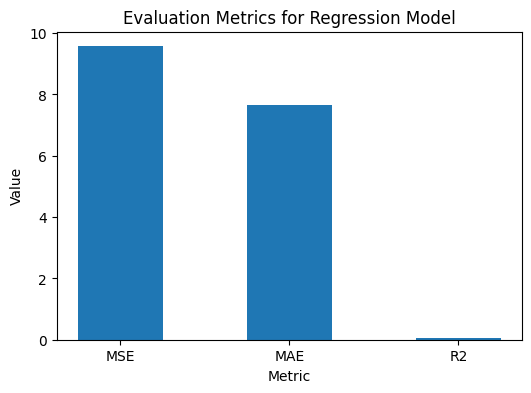

In [27]:
svm_model.fit(xTrain, yTrain)
preds_test = svm_model.predict(xTest)
preds_train = svm_model.predict(xTrain)

svm_mse = mean_squared_error(yTest, preds_test)
svm_mae = mean_absolute_error(yTest, preds_test)
svm_r2 = r2_score(yTest, preds_test)
svm_rmse = np.sqrt(svm_mse)

print('SVM RMSE:', svm_rmse)
print('SVM mae', svm_mae)
print('SVM R2-Score', svm_r2)
metrics = ['MSE', 'MAE', 'R2']
values = [svm_rmse, svm_mae, svm_r2]

plt.figure(figsize=(6,4))
bar_width = 0.50

plt.bar(np.arange(len(metrics)), values, bar_width)

plt.xticks(np.arange(len(metrics)), metrics)
plt.title('Evaluation Metrics for Regression Model')
plt.xlabel('Metric')
plt.ylabel('Value')

plt.show()

In [ ]:
rf_model.fit(xTrain, yTrain)
preds_test = rf_model.predict(xTest)
preds_train = rf_model.predict(xTrain)

rf_mse = mean_squared_error(yTest, preds_test)
rf_mae = mean_absolute_error(yTest, preds_test)
rf_r2 = r2_score(yTest, preds_test)
rf_rmse = np.sqrt(rf_mse)

print('Random Forest RMSE:', rf_rmse)
print('Random Forest MAE', rf_mae)
print('Random Forest r2', rf_r2)

In [ ]:
xgb_model.fit(xTrain, yTrain)
predict_test = xgb_model.predict(xTest)
predict_train = xgb_model.predict(xTrain)

xgb_mse = mean_squared_error(yTest, predict_test)
xgb_mae = mean_absolute_error(yTest, preds_test)
xgb_r2 = r2_score(yTest, preds_test)
xgb_rmse = np.sqrt(xgb_mse)

print('XGBoost RMSE:', xgb_rmse)
print('XGBoost MAE:', xgb_mae)
print('XGBoost R2-Score', xgb_r2)

In [ ]:
models = ['SVM', 'XGBoost', 'Random Forest']
rmse_scores = [svm_rmse, xgb_rmse, rf_rmse]

plt.bar(models, rmse_scores)
plt.title('RMSE Scores for Parkinsons Disease Prediction')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

In [ ]:
models = ['SVM', 'XGBoost', 'Random Forest']
mae_scores = [svm_mae, xgb_mae, rf_mae]

plt.bar(models, mae_scores)
plt.title('MAE Scores for Parkinsons Disease Prediction')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

In [ ]:
models = ['SVM', 'XGBoost', 'Random Forest']
r2_scores = [svm_r2, xgb_r2, rf_r2]

plt.bar(models, r2_scores)
plt.title('R2 Scores for Parkinsons Disease Prediction')
plt.xlabel('Model')
plt.ylabel('R2')
plt.show()